In [2]:
import sys
from pathlib import Path

# Add /app to PYTHONPATH
project_root = Path("/app")
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

sys.path


['/usr/local/lib/python312.zip',
 '/usr/local/lib/python3.12',
 '/usr/local/lib/python3.12/lib-dynload',
 '',
 '/usr/local/lib/python3.12/site-packages',
 '/app']

In [14]:
import pandas as pd
from database.mongo_client import get_db

db = get_db()


In [15]:
runs = list(db.pipeline_runs.find())
runs_df = pd.DataFrame(runs)

runs_df[["_id", "status", "started_at", "finished_at"]]


,_id,status,started_at,finished_at
0,e4203c2d-4a61-427d-af46-47fb77824e76,success,2026-01-07 03:04:34.192,2026-01-07 03:04:42.274
1,5ba43c38-18f3-4f05-8b9f-42d1c24135db,success,2026-01-07 03:04:46.426,2026-01-07 03:04:54.464


In [16]:
records = []

for run in runs:
    run_id = run["_id"]
    status = run["status"]

    for step, metrics in run.get("steps", {}).items():
        for metric, value in metrics.items():
            records.append({
                "run_id": run_id,
                "status": status,
                "step": step,
                "metric": metric,
                "value": value
            })

steps_df = pd.DataFrame(records)
steps_df


,run_id,status,step,metric,value
0,e4203c2d-4a61-427d-af46-47fb77824e76,success,fake_ingestion,status,success
1,e4203c2d-4a61-427d-af46-47fb77824e76,success,fake_ingestion,started_at,2026-01-07 03:04:34.778000
2,e4203c2d-4a61-427d-af46-47fb77824e76,success,fake_ingestion,duration_sec,1.283394
3,e4203c2d-4a61-427d-af46-47fb77824e76,success,fake_ingestion,finished_at,2026-01-07 03:04:36.061000
4,e4203c2d-4a61-427d-af46-47fb77824e76,success,fake_ingestion,metrics,{'inserted': 100}
5,e4203c2d-4a61-427d-af46-47fb77824e76,success,csv_ingestion,status,success
6,e4203c2d-4a61-427d-af46-47fb77824e76,success,csv_ingestion,started_at,2026-01-07 03:04:36.657000
7,e4203c2d-4a61-427d-af46-47fb77824e76,success,csv_ingestion,duration_sec,1.509794
8,e4203c2d-4a61-427d-af46-47fb77824e76,success,csv_ingestion,finished_at,2026-01-07 03:04:38.166000
9,e4203c2d-4a61-427d-af46-47fb77824e76,success,csv_ingestion,metrics,"{'inserted': 6, 'rejected': 5}"


In [18]:
steps_df["value"] = pd.to_numeric(steps_df["value"], errors="coerce")


In [19]:
pivot = steps_df.pivot_table(
    index="step",
    columns="metric",
    values="value",
    aggfunc="mean"
).fillna(0)

pivot


metric,duration_sec
step,
category_aggregation,1.179062
csv_ingestion,1.485095
fake_ingestion,1.256887
monthly_aggregation,1.199623


<Axes: title={'center': 'Average Metrics per Pipeline Step'}, xlabel='step'>

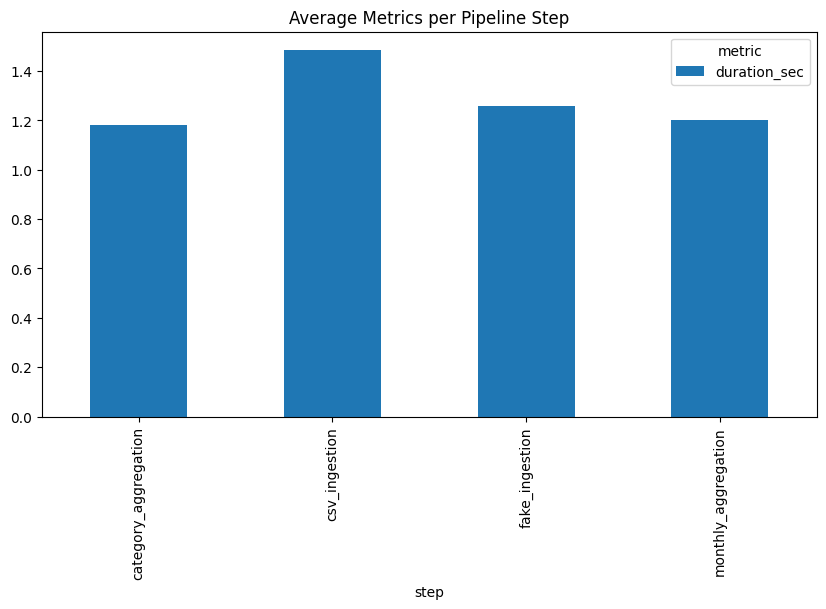

In [20]:
pivot.plot(kind="bar", figsize=(10, 5), title="Average Metrics per Pipeline Step")


In [21]:
failure_rate = (
    runs_df["status"]
    .value_counts(normalize=True)
    .rename("rate")
    .to_frame()
)

failure_rate


,rate
status,
success,1.0
